# Interventions and calibrations - Python

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

## Basis: SIR Model with a dynamic force of infection
$
\begin{align}
N & = S + I + R \\
\lambda & = \beta \frac{I}{N}\\
\frac{dS}{dt}&=-\lambda S\\
\frac{dI}{dt}&=\lambda S -\gamma I\\
\frac{dR}{dt}&=\gamma I
\end{align}
$

Further useful equalities:

$
R_{\text{eff}} = R_0 \frac{S}{N}
$

In [2]:
def sir_dynamic_model(t, y, beta, gamma ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S, lambd*S - gamma *I, gamma * I]
    return dydt

Text(0.5, 1.0, 'classic SIR')

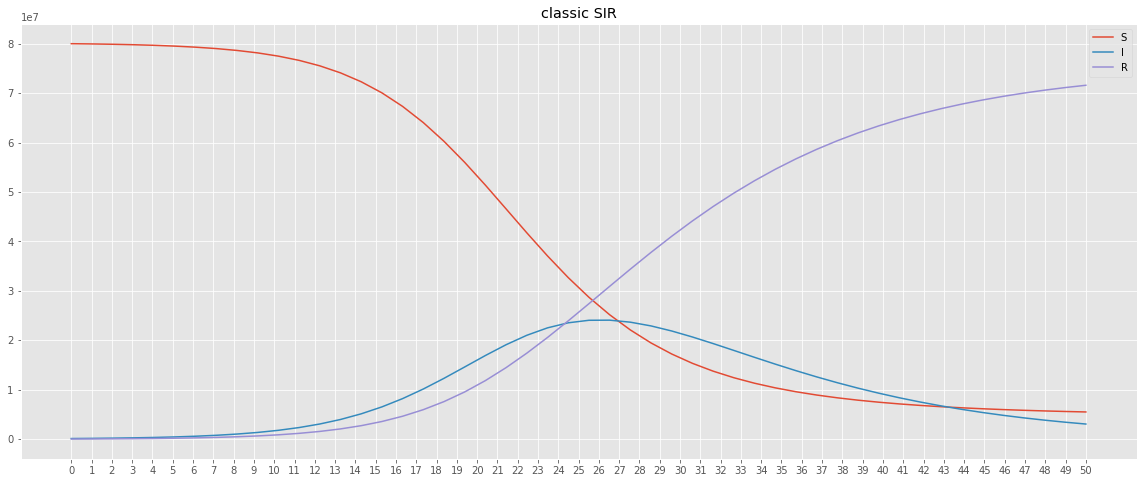

In [3]:
days = 50
t = np.linspace(0, days, days)
y = [80000000, 100000, 0]
beta = 3/7
gamma = 1/7

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
#print(sol)
fig, ax = plt.subplots(1,1,figsize=(20, 8))
plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'I')
plt.plot(t, sol[:, 2], label = 'R')
plt.legend()
_ = plt.xticks(range(0, days + 1))
plt.title("classic SIR")

## Modelling treatment:
$N$ =  300,000   
$I$ = 1  
$S$ = $N$ - 1  
$\beta$ = 0.6 days$^{-1}$  
$\gamma$ = 1/5 days$^{-1}$  
$\gamma_T$ = 4/5 days$^{-1}$  
$h$ = 1/4 days$^{-1}$  

$
\begin{align}
N & = S + I +T  + R \\
\lambda & = \beta \frac{I}{N} + \beta \frac{T}{N}\\
\frac{dS}{dt}&=-\lambda S\\
\frac{dI}{dt}&=\lambda S -\gamma I - h I\\
\frac{dT}{dt}&=h I -\gamma_T T\\
\frac{dR}{dt}&=\gamma I + \gamma_T T
\end{align}
$



In [4]:
def sir_dynamic_model_with_T(t, y, beta, gamma, h, gammaT ):
    S, I, R, T= y
    N = S + I + R + T
    lambd = beta * (I + T)/N

    dS = -lambd * S
    dI = lambd * S - gamma * I - h*I
    dT = h*I - gammaT * T
    dR = gamma * I + gammaT *T
    dydt = [dS, dI, dR, dT]
    return dydt

Text(0.5, 1.0, 'SIR with Treatment')

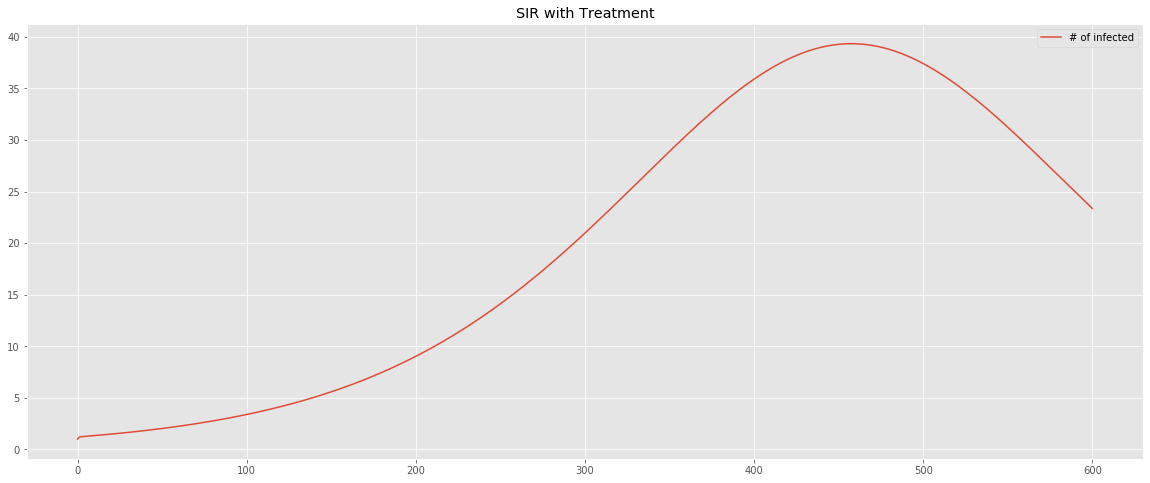

In [5]:
days = 600
t = np.linspace(0, days, days)
y = [300000 -1, 1, 0, 0]
beta = 0.6
gamma = 1/5
gammaT = 4/5
h = 1.5

sol = odeint(sir_dynamic_model_with_T,y, t, args=(beta, gamma, h, gammaT ), tfirst= True)
#print(sol)
fig, ax = plt.subplots(1,1,figsize=(20, 8))
#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label = 'I')
#plt.plot(t, sol[:, 2], label = 'R')
#plt.plot(t, sol[:, 3], label = 'T')
plt.plot(t, sol[:,1] + sol[:,3], label="# of infected")

plt.legend()
#_ = plt.xticks(range(0, days + 1))
plt.title("SIR with Treatment")

### A separate compartment for vaccination

$p$ = vaccination coverage

$N$ =  300,000   
$I$ = 1  
$S$ = $(1-p)N - 1$  
$V$ = $pN$  
$\beta$ = 0.6 days$^{-1}$  
$\gamma$ = 1/5 days$^{-1}$  

$
\begin{align}
N & = S + I + V + R \\
\lambda & = \beta \frac{I}{N} + \beta \frac{T}{N}\\
\frac{dS}{dt}&=-\lambda S\\
\frac{dI}{dt}&=\lambda S -\gamma I \\
\frac{dV}{dt}&= 0\\
\frac{dR}{dt}&=\gamma I
\end{align}
$



In [6]:
def sir_dynamic_model_with_V(t, y, beta, gamma ):
    S, I, R, V= y
    N = S + I + R + V
    lambd = beta * I/N

    dS = -lambd * S
    dI = lambd * S - gamma * I 
    dV = 0
    dR = gamma * I 
    dydt = [dS, dI, dR, dV]
    return dydt

Text(0.5, 1.0, 'SIR with Treatment')

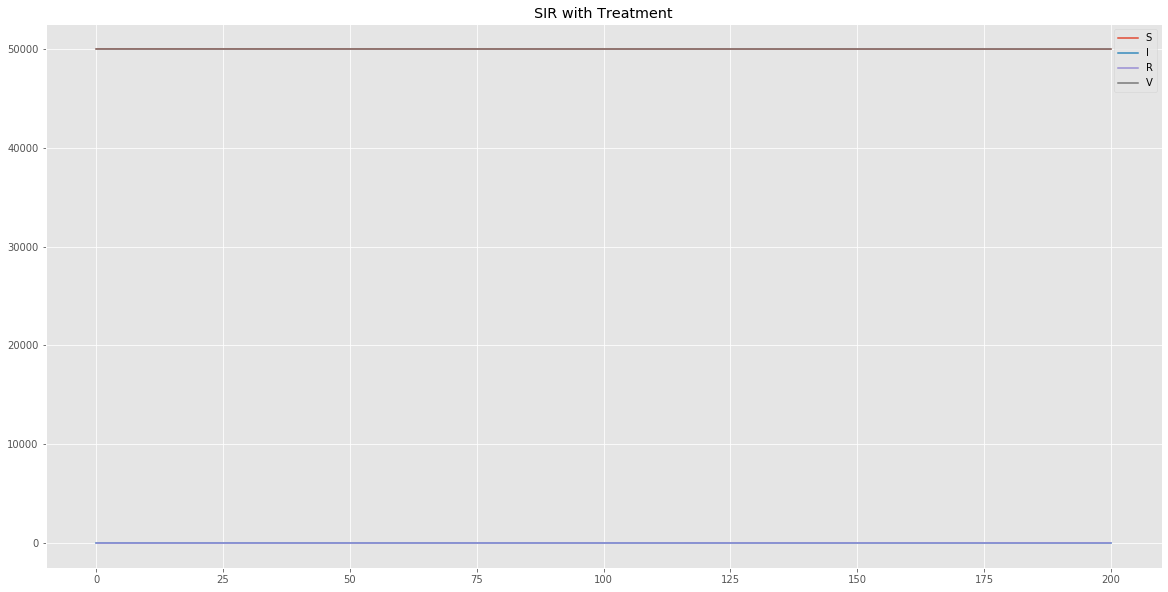

In [7]:
days = 200
t = np.linspace(0, days, days)
N = 100000
beta = 0.2
gamma = 0.1
p= (1-gamma/beta )
S = (1-p) * N - 1
V = p*N
I = 1
R = 0
y = [S, I , R, V]


sol = odeint(sir_dynamic_model_with_V,y, t, args=(beta, gamma ), tfirst= True)
#print(sol)
fig, ax = plt.subplots(1,1,figsize=(20, 10))
plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'I')
plt.plot(t, sol[:, 2], label = 'R')
plt.plot(t, sol[:, 3], label = 'V')


plt.legend()
#_ = plt.xticks(range(0, days + 1))
plt.title("SIR with Treatment")

### Leaky Vaccines

$p$ = vaccination coverage  
$c_s$ = 0.3 (=70 % efficacy)  
$N$ =  300,000   
$I$ = 1  
$S$ = $(1-p)N - 1$  
$V$ = $pN$  
$\beta$ = 0.25 days$^{-1}$  
$\gamma$ = 0.1 days$^{-1}$  

$
\begin{align}
N & = S + I + V + R \\
\frac{dS}{dt}&=-\beta \frac{I}{N} S\\
\frac{dI}{dt}&=\beta \frac{I}{N} S +c_s \beta\frac{I}{N}V -\gamma I \\
\frac{dV}{dt}&= - c_s \beta\frac{I}{N} V\\
\frac{dR}{dt}&=\gamma I
\end{align}
$


In [8]:
def sir_dynamic_model_with_lV(t, y, beta, gamma, cs ):
    S, I, R, V= y
    N = S + I + R + V

    dS = -beta *I* S/N
    dI = beta*I*S/N + beta*cs*I*V/N- gamma * I 
    dV = -cs * beta*I * V/N
    dR = gamma * I 
    dydt = [dS, dI, dR, dV]
    return dydt

Text(0.5, 1.0, 'SIR with leaky vaccines')

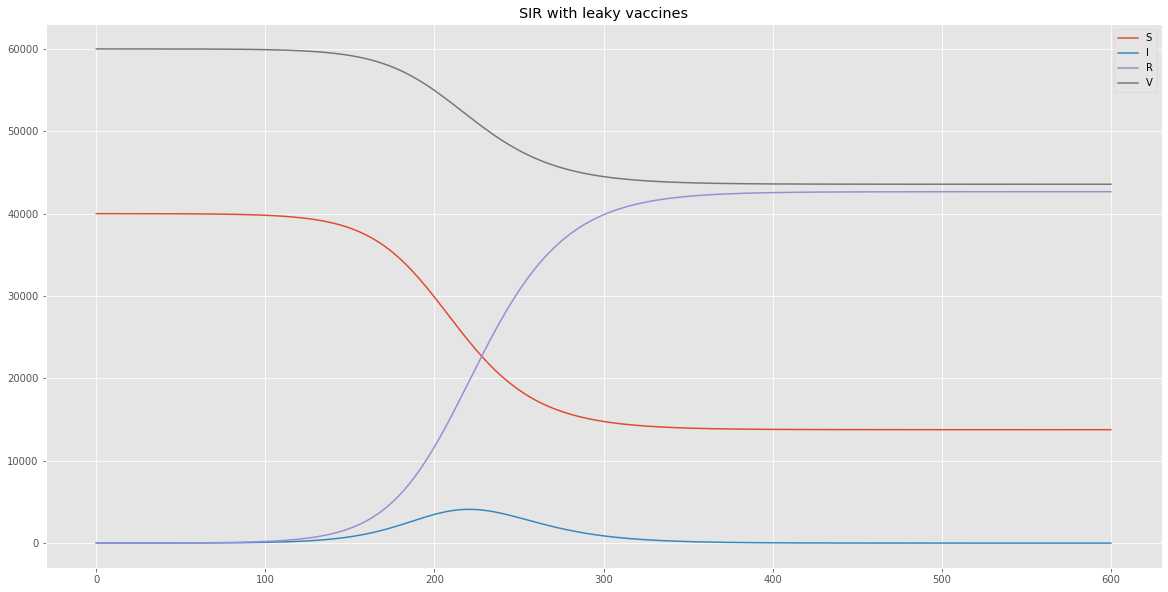

In [9]:
days = 600
t = np.linspace(0, days, days)
N = 100000
beta = 0.25
gamma = 0.1
cs = 0.3
p= (1-gamma/beta )
p=0.6
S = (1-p) * N - 1
V = p*N
I = 1
R = 0
y = [S, I , R, V]


sol = odeint(sir_dynamic_model_with_lV,y, t, args=(beta, gamma, cs ), tfirst= True)
#print(sol)
fig, ax = plt.subplots(1,1,figsize=(20, 10))
plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'I')
plt.plot(t, sol[:, 2], label = 'R')
plt.plot(t, sol[:, 3], label = 'V')


plt.legend()
#_ = plt.xticks(range(0, days + 1))
plt.title("SIR with leaky vaccines")

### Leaky Vaccines with additional effects

$p$ = vaccination coverage  
$c_s$ = 0.3 (=70 % efficacy)  
$c_i$ = effectiveness in reducing infectivity  
$N$ =  300,000   
$I$ = 1  
$I_v$ = 0  
$S$ = $(1-p)N - 1$  
$V$ = $pN$  
$\beta$ = 0.25 days$^{-1}$  
$\gamma$ = 0.1 days$^{-1}$  

$
\begin{align}
N & = S + I  + I_V + V + R \\
\frac{dS}{dt}&=-\beta \frac{I}{N} S - c_i\beta\frac{I_V}{N}S\\
\frac{dI}{dt}&=\beta \frac{I}{N} S +c_i \beta\frac{I_V}{N}S -\gamma I \\
\frac{dI_V}{dt}&=c_s\left( \beta\frac{I}{N} + c_i\beta\frac{I_V}{N}\right)V - \gamma I_V\\
\frac{dV}{dt}&= - c_s \left(\beta\frac{I}{N}+c_i \beta\frac{I_V}{N}\right) V\\
\frac{dR}{dt}&=\gamma I
\end{align}
$


In [10]:
def sir_dynamic_model_add_effects(t, y, beta, gamma, cs, ci ):
    S, I, Iv, R, V= y
    N = S + I  + Iv + R + V
    lambd = beta*I/N+beta*ci*Iv/N
    dS = -lambd*S
    dI = + lambd*S - gamma * I
    dIv = cs*lambd * V-gamma* Iv
    dV = -cs *lambd * V
    dR = gamma * I + gamma*Iv
    dydt = [dS, dI, dIv, dR, dV]
    return dydt

Text(0.5, 1.0, 'SIR with leaky vaccines')

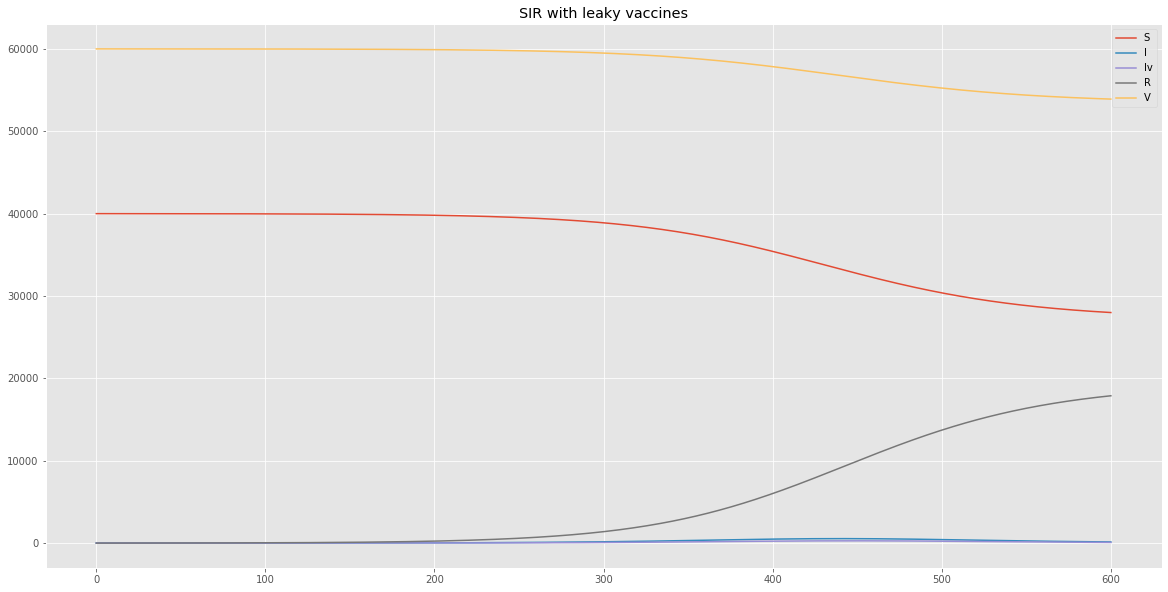

In [11]:
days = 600
t = np.linspace(0, days, days)
N = 100000
beta = 0.25
gamma = 0.1
cs = 0.3
ci = 0.4
p= (1-gamma/beta )
p=0.6
S = (1-p) * N - 1
V = p*N
I = 1
Iv = 0
R = 0
y = [S, I ,Iv, R, V]


sol = odeint(sir_dynamic_model_add_effects,y, t, args=(beta, gamma, cs, ci ), tfirst= True)
#print(sol)
fig, ax = plt.subplots(1,1,figsize=(20, 10))
plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'I')
plt.plot(t, sol[:, 2], label = 'Iv')
plt.plot(t, sol[:, 3], label = 'R')
plt.plot(t, sol[:, 4], label = 'V')


plt.legend()
#_ = plt.xticks(range(0, days + 1))
plt.title("SIR with leaky vaccines")

# Sum of Squares


In [12]:
def sir_dynamic_model(t, y, beta, gamma ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S, lambd*S - gamma *I, gamma * I]
    return dydt

Text(0.5, 1.0, 'classic SIR')

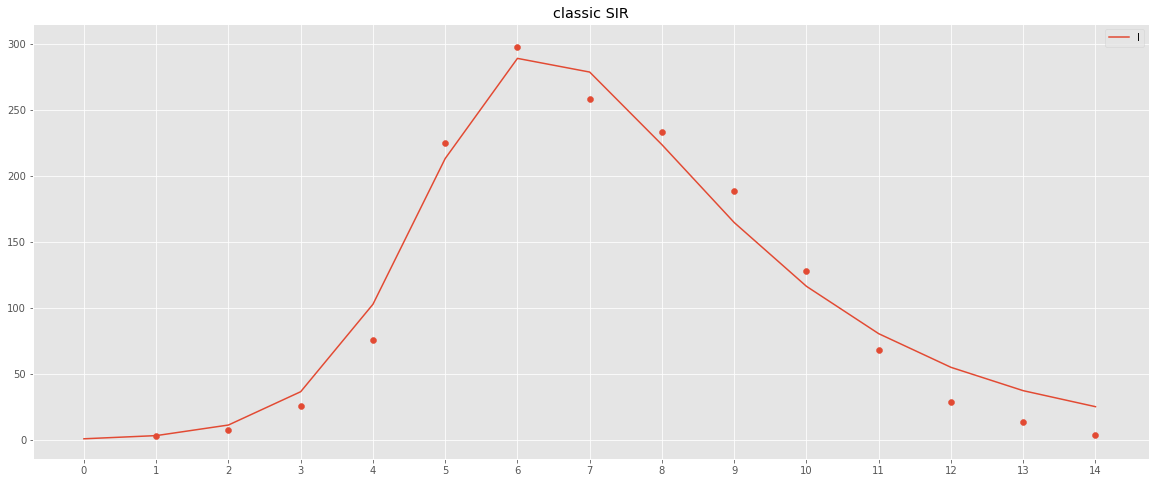

In [13]:
flu_data = pd.DataFrame({'time':range(1,15), 'number_infected':[3,8,26,76,225,298,258,233,189,128,68,29,14,4]})

days = 14
t = np.linspace(0, days , days +1  )
y = [762, 1, 0]
beta = 1.67
gamma = 0.44

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
#print(sol)


fig, ax = plt.subplots(1,1,figsize=(20, 8))
#plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'I')
#plt.plot(t, sol[:, 2], label = 'R')
plt.scatter(flu_data['time'], flu_data['number_infected'])
plt.legend()
_ = plt.xticks(range(0, days + 1))
plt.title("classic SIR")

In [14]:
# cost function
def sir_ssq(betagamma, t, y, data):
    beta, gamma = betagamma
    sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
    pred_inf = pd.DataFrame({'time':range(sol.shape[0]), 'number_pred':np.array(sol[:, 1])})
    data = data.merge(pred_inf, on='time')
    squares = (data['number_infected'] - data['number_pred'])**2
    return np.sum(squares)
    #return np.sum((pred_inf - data['number_infected'])**2)

beta = 1.7
gamma = 0.45
ssq = sir_ssq([beta, gamma], t, y, flu_data)
print(ssq)

beta = 1.15
gamma = 0.02
ssq= sir_ssq([ beta, gamma],t , y, flu_data)
print(ssq)



4630.2894802558885
2507764.1823267983


In [15]:
sol[:,1].shape

(15,)

In [16]:
from scipy.optimize import minimize

In [17]:
res = minimize(sir_ssq, x0=[1.5, 1.], args =(t,y,flu_data), method = 'BFGS')
res.x

C:\Users\norma\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


array([1.66922612, 0.44345019])

## Maximum likelihood


In [18]:
df_reported_cases = pd.read_csv('data/idm2_sir_reported_data.csv')
df_reported_cases

,time,number_reported
0,1,2
1,2,5
2,3,16
3,4,46
4,5,135
5,6,179
6,7,155
7,8,140
8,9,113
9,10,77


Text(0.5, 1.0, 'classic SIR')

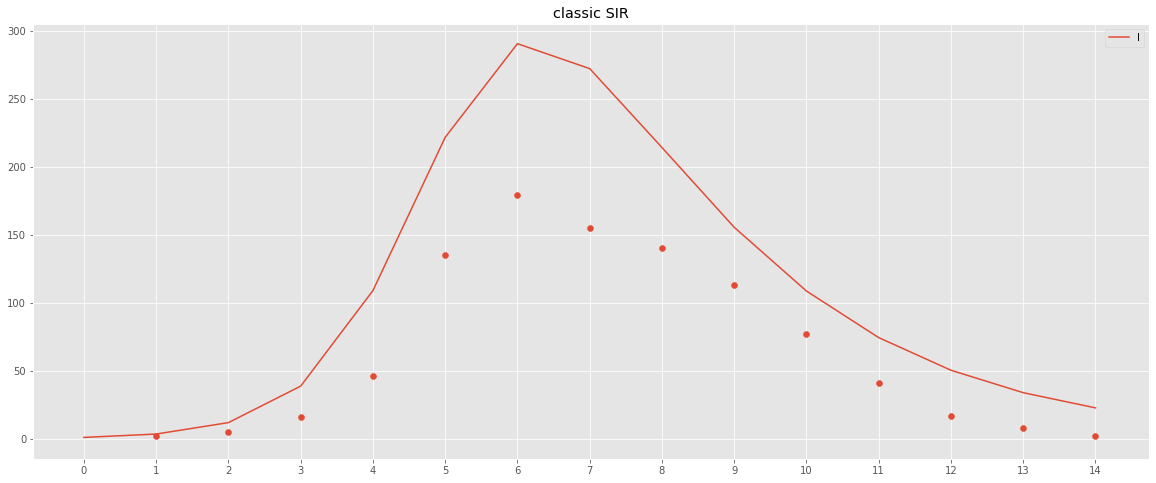

In [19]:
days = 14
t = np.arange(0, 15 , 1 )
y = [762, 1, 0]
beta = 1.7
gamma = 0.45

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
#print(sol)


fig, ax = plt.subplots(1,1,figsize=(20, 8))
#plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'I')
#plt.plot(t, sol[:, 2], label = 'R')
plt.scatter(df_reported_cases['time'], df_reported_cases['number_reported'])
plt.legend()
_ = plt.xticks(range(0, days + 1))
plt.title("classic SIR")

In [20]:
def loglik_function(parameters, data):
    beta, gamma = parameters
    days = 14
    t = np.arange(0, 15 , 1 )
    y = [762, 1, 0]
    sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
    df_sol = pd.DataFrame(sol[1:], columns=['S', 'I', 'R'])
    df = pd.concat([df_reported_cases, df_sol], axis=1)
    df['poisson'] = df.apply(lambda x: poisson.logpmf(x['number_reported'], 0.6 *x['I']) , axis=1)
    result = df['poisson'].sum()
    return result * -1
    
    

In [21]:
loglik_function([1.7, 0.45], df_reported_cases)

NameError: name 'poisson' is not defined

In [22]:
res = minimize(loglik_function, x0=[1.5, 1.], args = (df_reported_cases, ), method = 'BFGS')
res.x

NameError: name 'poisson' is not defined

In [23]:
from scipy.stats import poisson
dists = []
for i in range(sol.shape[0] -1):
    #(s[1])
    dists.append(poisson.pmf(df_reported_cases.iloc[i, 1] , sol[i +1, 1]))
dists

[0.18716689809145345,
 0.013668372724547396,
 1.891087748230493e-05,
 4.479075851883253e-12,
 9.51320115147895e-11,
 4.99228065996125e-13,
 3.348603743239349e-15,
 1.4736049915205095e-08,
 6.13234180423225e-05,
 0.00027014743803379976,
 8.009830188812688e-06,
 3.2386580694591855e-08,
 8.240347807324986e-08,
 3.520711773304224e-08]

In [24]:
sol

array([[762.        ,   1.        ,   0.        ],
       [758.63357985,   3.47216267,   0.89425748],
       [747.14456161,  11.8790684 ,   3.97637   ],
       [710.04041972,  38.69547646,  14.26410382],
       [608.64909071, 108.9671786 ,  45.38373069],
       [422.04423658, 221.62418256, 119.33158086],
       [234.58503053, 290.46768331, 237.94728616],
       [123.75332897, 272.13356519, 367.11310583],
       [ 71.80529193, 214.14252946, 477.05217861],
       [ 47.64893247, 155.47117241, 559.87989512],
       [ 35.59254827, 108.60790403, 618.7995477 ],
       [ 29.09158963,  74.373983  , 659.53442737],
       [ 25.35862207,  50.37026588, 687.27111206],
       [ 23.11353703,  33.89261165, 705.99385132],
       [ 21.71859008,  22.71491379, 718.56649612]])

## Task
A new respiratory virus has begun circulating in another country. So far, epidemiological investigations have yielded the data below. Write down a model for this disease and use the information below to determine the values of all model parameters. If a vaccine conferring ‘all-or-nothing’ immunity with 80% effectiveness becomes available before an epidemic begins in your own country, what is the minimum coverage of this vaccine, in order to prevent an epidemic?

Epidemiological data
All infected individuals go through an incubation period, which lasts on average for 4 days. During this time, individuals are not infectious, nor do they have any excess mortality risk.
All infected individuals eventually develop symptoms, and the mean duration of symptoms is 5 days. Symptomatic individuals are infectious, as well as having a 3% case fatality rate. Those who survive the infection are thought to have long-term immunity.
In the source country, the peak prevalence (i.e. maximum number of symptomatic people during the epidemic) was observed to be 8% of the population.
Assume that the source country and your own country are epidemiologically equivalent (i.e. that disease transmission follows the same parameters in both settings).
Hint: You may find it helpful to use a combination of paper-based and computer-based modelling, to answer these questions. Since the data is in the form of proportions, not absolute numbers, your choice of population size should not affect your answers to the questions above. Note down all the parameters and values you calculate or estimate during your work.


$p$ = unknown vaccination coverage  
$c_s$ = 0.2 (=80 % efficacy)  
$N$ =  100,000   
$I$ = 1  
$S$ = $(1-p)N - 1$  
$V$ = $pN$  
$\beta$ = unknown days$^{-1}$  
$\gamma$ = 1/5 days$^{-1}$  
$a$ = 1/4 days$^{-1}$  
$c_f$ = 0.03 (case fatality rate)

$
\begin{align}
N & = S + I + V + R + E\\
\frac{dS}{dt}&=-\beta \frac{I}{N} S\\
\frac{dE}{dt}&=\beta \frac{I}{N} S +c_s \beta\frac{I}{N}V -a E \\
\frac{dI}{dt}&=a E -(1-c_f)\gamma I - c_f \gamma I \\
\frac{dV}{dt}&= - c_s \beta\frac{I}{N} V\\
\frac{dR}{dt}&=(1-c_f)\gamma I \\
\frac{dM}{dt}&=c_f \gamma I
\end{align}
$


In [25]:
def seirvm_dynamic_model(t, y, beta, gamma, cs, a, cf ):
    S, E, I, R, V, M= y
    N = S + I + R + V

    dS = -beta *I* S/N
    dE = beta*I*S/N + beta*cs*I*V/N-  a*E
    dI = a * E -(1-cf) * gamma * I  - cf*I
    dV = -cs * beta*I * V/N
    dR = (1-cf)*gamma * I 
    dM = (cf * I)
    dydt = [dS, dE, dI, dR, dV, dM]
    return dydt

0.08009661494542172


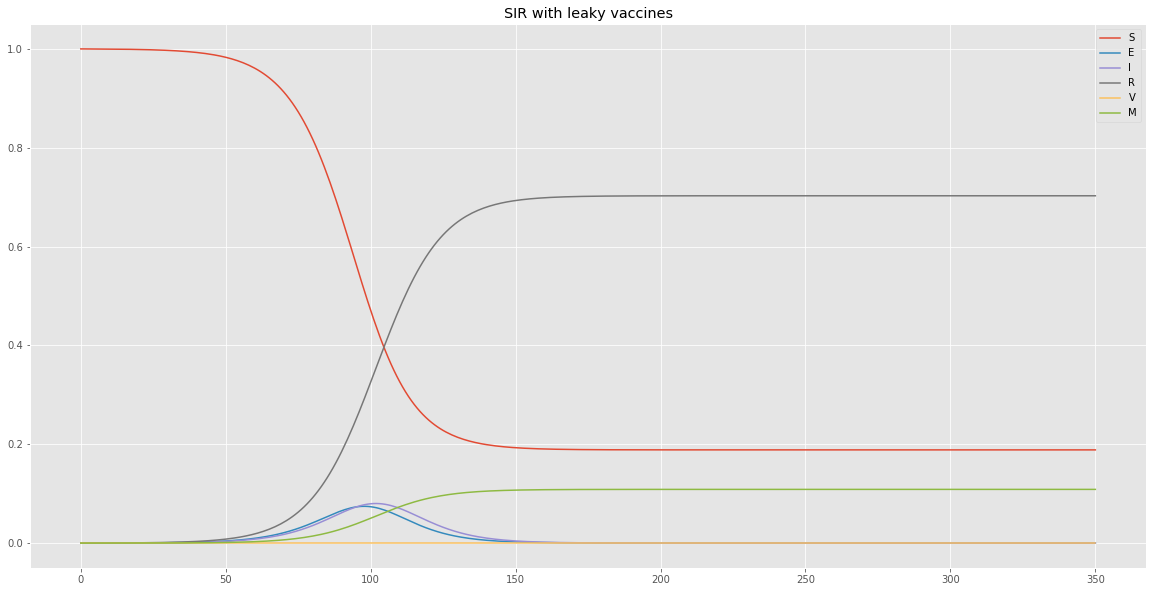

In [26]:
days = 350
t = np.linspace(0, days, days + 1)
N = 1
beta = 0.413
gamma = 1/5
a = 1/4
cf = 0.03
cs = 0.2
#p= (1-gamma/beta )
p=0.0
S = (1-p) * N
V = p*N
I = 0.0001 * N
R = 0
E = 0
M = 0
y = [S, E, I , R, V, M]


sol = odeint(seirvm_dynamic_model,y, t, args=(beta, gamma, cs, a, cf ), tfirst= True)
#print(sol)
fig, ax = plt.subplots(1,1,figsize=(20, 10))
plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label = 'E')
plt.plot(t, sol[:, 2], label = 'I')
plt.plot(t, sol[:, 3], label = 'R')
plt.plot(t, sol[:, 4], label = 'V')
plt.plot(t, sol[:, 5], label = 'M')




plt.legend()
#_ = plt.xticks(range(0, days + 1))
plt.title("SIR with leaky vaccines")
print(np.max(sol[:,2]))


##### np.max(sol[:, 3])